In [1]:
%load_ext autoreload
%autoreload 2
from notebook import *
# if get something about NUMEXPR_MAX_THREADS being set incorrectly, don't worry.  It's not a problem.

The key is already registered


Done loading notebook! We're good to go!


<div class="namebox">    
Double Click to edit and enter your

1.  Hugo Wam
2.  twan012
3.  twan012@ucr.edu
    
</div>

<div style=" font-size: 300% !important;
    margin-top: 1.5em;
    margin-bottom: 10px;
    font-weight: bold;
    line-height: 1.0;
    text-align:center;">
Assignment 2: Inside Out Your Memory Hierarchy and Understand Cache Misses!
</div>

In this assignment, you'll learn about the concepts of:

1.  Memory alignment
2.  Thinking in cache lines
3.  Working sets
4.  The cache hierarchy
5.  The impact of miss rate on performance
6.  Spatial locality
7.  Temporal locality

This assignment includes a programming assignment. 

Check the course schedule for due date(s).

We need to thank [Dr. Steven Swanson](https://cseweb.ucsd.edu/~swanson/) as a significant part of the assignment is orginated from Dr. Swanson's teaching materials.

# FAQ and Updates

* There are no updates, yet.

# About Assignments/Labs In This Class



_This section is the same in all the assignments.  It's repeated here for your reference._

CS203 assignments are designed in a way to **learn by doing**.  This means you _must_ **do**.  WE have built these assignments as Jupyter notebooks so that the "doing" is as easy and seamless as possible. (Largely contributed by Steven Swanson at UCSD https://cseweb.ucr.edu/~swanson/)

In this assignment, what you'll do is answer questions about how a program will run and then compare what really happened to your predictions.  Engaging with this process is how you'll learn.  The questions that the assignment asks are there for several purposes:

1.  To draw your attention to specific aspects of an experiment or of some results.
2.  To push you to engage with the material more deeply by thinking about it.
3.  To make you commit to a prediction so you can wonder why your prediction was wrong or be proud that you got it right.
4.  To provide some practice with skills/concepts you're learning in this course.
5.  To test your knowledge about what you've learned.

You'll notice that there are three kinds of questions: "Correctness", "Challenging", and "Completeness". 

<div class="alert alert-block alert-success">

**Correctness**: You need to answer these questions with correct answers and supporting evidences (e.g., explainations, formula, equations) to get credits.

</div>
<div class="alert alert-block alert-warning">

**Challenging**: These questions are also graded by correctness, but they account for 20% of the grades in this assignment in total as they're more difficult or repetitive. 

</div>

<div class="alert alert-block alert-info">

**Completeness**: You need to complete all these questions to receive credits. We do not grade these questions on correctness, but you need to show significant efforts regarding your process of deriving the answers.

</div>

In other words, 
- If you want to get full credits, you need to answer all **Correctness** and **Challenging** correctly, and finish all **Completeness** questions.
- If you want to get 80% of the credits, you still need to answer all **Correctness** correctly and finish **Completeness** questions.

Many of our questions must answer based on prior experimental results. If you skip any prior cell, you may get a parsing error in questions from our autograder.

Some of the "Completeness" problems include a solution that will be hidden until you click the triangle below the question.  To get the most from them, try them on your own first.

Many of the "Completeness" questions ask you to make predictions about the outcome of an experiment and write down those predictions.  To maximize your learning, think carefully about your prediction and commit to it.  **You will never be penalized for making an incorrect prediction.**

You are free to discuss questions with your classmatesm, but you must complete all questions on your own.

If you have questions about any kind of question, please ask during office hours or during class.


## How To Succeed On the assignments

Here are some simple tips that will help you do well on this assignment:

1.  Read/skim through the entire assignment and review the lecture/textbook. 
2.  Start early.  Getting answers on discord can take time.  So think through the questions (and your questions about them) carefully.
    1. Go through the assignment once (several days before the deadline), do the parts that are easy/make sense
    2. Ask questions/think about the rest
    3. Come back and do the rest.
3.  Start early.  The gradescope server/cluster can be busy and slow near deadlines.  **"The gradescope server/cluster was slow the night of the deadline"** is **not an excuse** for not getting the assignment done and it is not justification for asking for an extension.
4.  Follow the guidelines below for asking answerable questions on discord.

You may think to yourself: "If I start early enough to account for all that, I'd have to start right after the assignment was announced!"  Good thought!

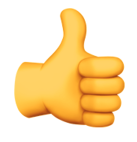

<div class="alert alert-block alert-danger">

**The Cluster Will Get Slow** and our machines will get crowded and slow _before every deadline_.  This is completely predictable.  The cluster can also get crowded due to deadlines in other courses.  You need to start early so you can avoid/work around these slowdowns.  Unless there's some kind of complete outage, we will not grant extensions because the servers are crowded.
    
</div>

## Getting Help

You might run into trouble while doing this assignment.  Here's how to get help:

1.  Re-read the instructions and make sure you've followed them.
2.  Try saving and reloading the notebook.
3.  If you get a `FileNotFoundError` make sure you've run all the code cells above your current point in the assignment.
4.  If you get a message like `render_code is not defined`, please make sure you've run all the code cells above your current point in the assignment.
5.  If you get an exception or stack dump, check that you didn't accidentally modify the contents of one of the python cells.
6.  If all else fails, post a question to discord or visit an office hour.

## Posting Answerable Questions on Discord

If you want useful answers on discord, you need to provide information that is specific enough for us to provide a useful answer.  Here's what we need:

1.  Which part of which assignment are you working on (use the section numbers)?
2.  Which problem (copy and paste the _text_ of the question along with the number).

If it's question about instructions:

1.  Try to be as specific as you can about what is confusing or what you don't understand (e.g., "I'm not sure if I should do _X_ or _Y_.")

If it's a question about an error while running code, then we need:

1.  If you've committed anything, your github repo url.
2.  If you've submitted a job with `cs203` you _must_ provide the job id.  With the id, we can figure out just about anything about your job.  Without it, we know nothing.
3.  The _entire_ output you received.  There's no limit on how long an discord post can be.  Give us all the information, not just the last few lines.  We like to scroll!

For all of the above **paste the text** into the discord question.  Please **do not provide screen captures**.  The course staff refuses to type in job ids found in screen shots.


<div class="alert alert-block alert-danger">

**We Can't Answer Unanswerable Questions** If you don't follow these guidelines (especially about the github repo and the job id), we will probably not be able to answer your question on discord.  We will archive it and ask you to re-post your question with the information we need.
    
**We Can't Answer Questions 24/7** Please respect the fact that the TAs/instructors are real human beings and we have limitations and other job commitments. Please give people at least 24 hours to answer a question. In other words, you should not expect a question 24 hours before the deadline to be answered in time.
    
</div>

## Keeping Your assignment Up-to-Date

Occasionally, there will be changes made to the base repository after the
lab is released.  This may include bug fixes and updates to this document.  We'll post on discord when an update is available.

In those cases, you can use the following commands to pull the changes from upstream and merge them into your code.  You'll need to do this at a shell.  It won't work properly in the notebook.  

**Important: Save your notebook in the browser first.**


```
cd <your directory for this assignment>git remote add upstream $(cat .starter_repo)  # You need to do this once each time you checkout a new assignment. It will fail 
                                              # harmlessly if you run it more than once.
cp assignment.ipynb assignment.backup.ipynb                 # Backup your work.
git commit -am "My progress so far."          # commit your work.
git pull upstream main --allow-unrelated-histories -X theirs # pull the updates
```

Or you can use the script we provide:

In [42]:
# Important!!! Be sure to click save to preseve your progress before using the following script
! ./fix-repo
! ./pull-updates
# Then reload this page in your browser!!!

fatal: remote upstream already exists.
[main a7b52b3] My progress so far.
 1 file changed, 7 insertions(+), 7 deletions(-)
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 4), reused 4 (delta 2), pack-reused 0 (from 0)
Unpacking objects: 100% (6/6), 572 bytes | 1024 bytes/s, done.
From github.com:CS203UCR/2025fa-cs203-memory-1-starter
 * branch            main       -> FETCH_HEAD
   8d8444a..438fcb6  main       -> upstream/main
Auto-merging assignment.ipynb
Merge made by the 'recursive' strategy.
 assignment.ipynb | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


**Important: Then, reload this page in your browser.**

<div class="alert alert-block alert-danger">

**The Cluster Will Get Slow** and our machines will get crowded and slow _before every deadline_.  This is completely predictable.  The cluster can also get crowded due to deadlines in other courses.  You need to start early so you can avoid/work around these slowdowns.  Unless there's some kind of complete outage, we will not grant extensions because the servers are crowded.
    
</div>

## How To Use This Document

You will use Jupyter Notebook to complete this assignment/lab.  You should be able to do much of this assignment/lab without leaving Jupyter Notebook.  The main exception will be some of the programming chanllenges.  The instructions will make it clear when you should use the terminal.

### Running Code

Jupyter Notebooks are made up of "cells".  Some have Markdown-formatted text in them (like this one).  Some have Python code (like the one below).

For code cells, you press `shift-return` to execute the code.  Try it below:

In [3]:
print("I'm in python")

I'm in python


Code cells can also execute shell commands using the `!` operator.  Try it below:

In [4]:
!echo "I'm in a shell"

I'm in a shell


### Telling What The Notebook is Doing

The notebook will only run one cell at a time, so if you press `shift-return` several times, the cells will wait for one another.  You can tell that a cell is waiting if it there's a `*` in the `[]` to the left the cell:

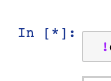


You'll can also tell _where_ the notebook is executing by looking at the table of contents on the left.  The section with the currently-executing cell will be red:

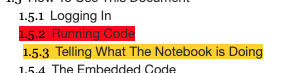

### What to Do Jupyter Notebook It Gets Stuck

First, check if it's actually stuck: Some of the cells take a while, but they will usually provide some visual sign of progress.  If _nothing_ is happening for more than 10 seconds, it's probably stuck.

To get it unstuck, you stop execution of the current cell with the "interrupt button":

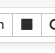

You can also restart the underlying python instance (i.e., the confusingly-named "kernel" which is not the same thing as the operating system kernel) with the restart button:

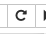

Once you do this, all the variables defined by earlier cells are gone, so you may get some errors.  You may need to re-run the cells in the current section to get things to work again.

You can also try reloading the web page.  That will leave Python kernel intact, but it can help with some problems.

### The Embedded Code

The code embedded in the assignment falls into two categories:

1.  Code you need to edit and understand.
2.  Code that you do not need to edit or understand -- it's just there to display something for you.

For code in the first category, the assignment will make it clear that you need to study, modify, and/or run the code.  If we don't explicitly ask you to do something, you don't need to.

Most of the code in the second category is for drawing graphs.  You can just run it with shift-return to the see the results.  If you are curious, it's mostly written with `Pandas` and `matplotlib`. The code is all in `notebook.py`.   These cells should be un-editable.  However, if you want to experiment with them, you can copy _the contents_ of the cell into a new cell and do whatever you want (If you copy the cell, the copy will also be uneditable).

<div class="alert alert-block alert-danger">

**Most Cells are Immutable** Many of the cells of this notebook are uneditable. The only ones you should edit are some of the code cells and the text cells with questions in them.
</div>

### Answering Questions

Throughout this document, you'll see some questions (like the one below).  You can double click on them to edit them and fill in your answer.  Try not to mess up the formatting (so it's easy for us to grade), but at least make sure your answer shows up clearly.  When you are done editing, you can `shift-return` to make it pretty again.

A few tips, pointers, and caveats for answering questions:

1. The answers are all in [github-flavored markdown](https://guides.github.com/features/mastering-markdown/) with some html sprinkled in.  Leave the html alone.
2. Many answers require you to fill in a table, and many of the `|` characters will be missing.  You'll need to add them back.
3. The HTML needs to start at the beginning of a line.  If there are spaces before a tag, it won't render properly.  If you accidentally add white space at the beginning of a line with an html tag on it, you'll need to fix it.
4. Text answers also need to start at the beginning of a line, otherwise they will be rendered as code.
5. Press `shift-return` or `option-return` to render the cell and make sure it looks good.
6. There needs to be a blank line between html tags and markdown.  Otherwise, the markdown formatting will not appear correctly.
7. Many of our questions must answer based on prior experimental results. If you skip any prior cell, you may get a parsing error in questions from our autograder.


You'll notice that there are three kinds of questions: "Correctness", "Completeness", and "Challenging". 

- Correctness: You need to answer these questions with correct answers and supporting evidences (e.g., explainations, formula, equations) to get credits.

- Challenging: These questions are also graded by correctness, but they account for 20% of the grades in this assignment in total as they're more difficult or repetitive.

- Completeness: You need to complete all these questions to receive credits. We do not grade these questions on correctness, but you need to show significant efforts regarding your process of deriving the answers.

### Regarding Our Autograder

In this class, we introduced the autograder on Gradescope. However, please be aware the purpose of autograder is to replace the TA and potentially give you early feedback of your assignment if you submit early. The autograder is not intended to give you a short-cut of receiving full credits in assignments. Here are some disclaimers about our autograders and tips regarding how to compose good answers.

1. Please provide **detailed** explainations and processes, not just the answer. Please consider the autograder as a real TA/professor. We want to see how you get an answer, not just the answer itself.
2. Please use the **precise** terminology/wording as we teach/use in the class/assignment. Being precise is very important in communications and collaborative environments.  
3. Please use the **exact** numbers from your measurements and please don't round your computation result if appropriate. For many questions that ask you to evaluate the answers using the real performance counter results, the autograder will parse some prior cells and grade your answers based on the experimental result. The autograder cannot correctly identify if you really use those results if you round your numbers from the output of the performance numbers.
4. Please have the **right expectations** of the response from the autograder. As a normal TA/instructor, the autograder's response is not to tell you how to get a correct answer, but only provide a general feedback regarding where/what you might get wrong. If you really need personalized help or clarification regarding the concept of questions, please consider visiting an office hour or asking on discord at an appropriate timeslot.
5. Please be aware that autograder are already **more relaxed** than the TAs/instructor. The autograder are more flexible than the TAs/instructor since we cannot have too complex heuristics in the autograder. That also means that you have to pay attention to the released solution. Getting full credits from the autograder does not mean you will get the same when the TAs/instructor grade the same question.

# Understanding another aspect of the processor

In this assignment, we wll continue using the Intel(R) Xeon(R) Gold 6140 "Skylake" processor that you've been used in previous assignments. Now, as you have more knowledge about computer architectures, let's take a look of the processor detail again and see if you have different feelings.

In [5]:
! cs203 run 'lscpu'

Running on the cloud for: twan012@ucr.edu
Architecture:                         x86_64
CPU op-mode(s):                       32-bit, 64-bit
Byte Order:                           Little Endian
Address sizes:                        46 bits physical, 48 bits virtual
CPU(s):                               72
On-line CPU(s) list:                  0-71
Thread(s) per core:                   2
Core(s) per socket:                   18
Socket(s):                            2
NUMA node(s):                         2
Vendor ID:                            GenuineIntel
CPU family:                           6
Model:                                85
Model name:                           Intel(R) Xeon(R) Gold 6140 CPU @ 2.30GHz
Stepping:                             4
CPU MHz:                              2300.000
CPU max MHz:                          3700.0000
CPU min MHz:                          1000.0000
BogoMIPS:                             4600.00
Virtualization:                       VT-x
L1d cach

As we learned in the lectures, the cache configuration determines the performance of executing code. Knowing the cache configurations and the parameters -- $A, B, C, S$ would help us to better predict how memory accesses will behave when executing code. The following command will help us getting these important cache configurations and parameters on the bare metal cloud machine. 

In [6]:
!cs203 run 'getconf -a | grep CACHE'

Running on the cloud for: twan012@ucr.edu
LEVEL1_ICACHE_SIZE                 32768
LEVEL1_ICACHE_ASSOC                8
LEVEL1_ICACHE_LINESIZE             64
LEVEL1_DCACHE_SIZE                 32768
LEVEL1_DCACHE_ASSOC                8
LEVEL1_DCACHE_LINESIZE             64
LEVEL2_CACHE_SIZE                  1048576
LEVEL2_CACHE_ASSOC                 16
LEVEL2_CACHE_LINESIZE              64
LEVEL3_CACHE_SIZE                  25952256
LEVEL3_CACHE_ASSOC                 11
LEVEL3_CACHE_LINESIZE              64
LEVEL4_CACHE_SIZE                  0
LEVEL4_CACHE_ASSOC                 0
LEVEL4_CACHE_LINESIZE              0


<div class="alert alert-block alert-success">

### Question 1 (Correctness)

<div class="question-text">

Reading the output from the above command, let's focus on "LEVEL1_D", namely, the L1 data cache configuration first. Remember the $C=ABS$ equation we taught in class, can you try to answer the following questions? 
</div>
    
<div class="answer">

| Cache Parameter  | Value |
| ---------------- | -----|
|               C  |       |
|               A  |       |
|               B  |       |
|               S  |       |
| # of offset bits |       |
| # of index bits  |       |
    

</div>
</div>

<div class="alert alert-block alert-success">
<div class="answer">
You answers:


| Cache Parameter  | Value |
| ---------------- | ----- |
|               C  |   32768    |
|               A  |   8    |
|               B  |    64   |
|               S  |  64     |
| # of offset bits |    6   |
| # of index bits  |    6   |

    
**Show your work here -- you must use latex and the formulas taught in the lecture to score**

Equation:
$$ C = ABS $$
- C: Capacity in data arrays = LEVEL1_DCACHE_SIZE = 32768
- A: Way-Associativity = LEVEL1_DCACHE_ASSO = 8
- B: Block Size (Linesize) = LEVEL1_DCACHE_LINESIZE = 64
- S: Number of Sets = LEVEL1_DCACHE_SIZE $\div$ LEVEL1_DCACHE_ASSO $\div$ LEVEL1_DCACHE_LINESIZE = 32768 $\div$ 8 $\div$ 64 = 64

- Number of offset bits: $$lg(B) = lg(LEVEL1\_DCACHE\_LINESIZE) = lg(64) =6 \ bits$$
- Number of index bits: $$lg(S) = lg(Number \ of  \ Sets) = lg(64) =6 \ bits$$
</div>
</div>

# When will a program access "data memory"

In the von Neumann architecture, a program can access memory when (1) fetching instructions, technically, every instruction, and (2) accessing (read/write) data upon a request from an instruction. To predict and optimize the effect of memory access in our code, understanding and predicting the pattern of memory accesses is important. Since instruction memory access occurs every instruction and typically has strong localities, we focus more on the data memory access part, that is less regular, in this assignment. 

Let's take a look of the following `array` function.


In [7]:
array = build(code(r"""

#include<cstdint>
#include<cstdlib>

extern "C" 
uint64_t* array(uint64_t * data, uint64_t size, uint64_t arg1) {
    uint64_t sum=0;
    for(uint x = 0; x < size; x++) {
        sum+=data[x];
    }

    data[0] = sum;
    return data;
}

"""),build_parameters=arg_map(OPTIMIZE=["-mno-avx -O0","-mno-avx -O1"]))

compare([array[0].asm("array"), array[1].asm("array")],
        ["-mno-avx -O0","-mno-avx -O1"])

  0%|          | 0/2 [00:00<?, ?it/s]

<div class="alert alert-block alert-success"><div class="question correctness">

### Question 2 (Correctness)

<div class="question-text">

Investigating the two versions, unoptimized (i.e., -O0) and optimized (i.e., -O1)of the compiled code, please identify where the code stores the variables `x` and `size`, and which instruction accesses `data[x]`. 
</div>

</div>
</div>

<div class="alert alert-block alert-success">
    
<div class="answer">

Answer: 

| Question                                 | Unoptimized        | Optimized |
| ---------------------------------------- | ------------------ | --------- |
| 1. Where does the code store `x`?        |     -12(%rbp)      |     %ecx    |
| 2. Where does the code store `size`?     |     -32(%rbp)      |        %rsi       |
| 3. Where does the code access `data[x]`? | movq (%rax), %rax |  addq (%rax, %rdx, 8), %r8   |


Please explain using the evidences from the assembly code above:

Unoptimized:
1. Where is `x` stored for Unoptimized code? \
The instruction `movl $0, -12(%rbp)` initializes `x` to 0, showing that `x` is kept on the stack at address `-12(%rbp)`. \
Later, `movl -12(%rbp), %eax` loads `x` into `%eax` for use in calculations. \
Then, `leaq 0(,%rax,8), %rdx` scales `x` by 8 (for 8-byte elements), and `addq %rdx, %rax` adds this offset to the base data pointer. \
Hence, all accesses to `x` go through memory, confirming it is stored at `-12(%rbp)`.

2. Where is `size` stored for Unoptimized code? \
The instruction `movq %rsi, -32(%rbp)` stores the function’s second parameter (the size) on the stack. \
During the loop condition check, `cmpq %rax, -32(%rbp)` compares the loop index `x` (in %rax) with the stored `size`, showing that `size` resides at `-32(%rbp)`.

3. How is `data[x]` accessed for Unoptimized code? \
The sequence `movq -24(%rbp), %rax` loads the base address of the array, and `leaq 0(,%rax,8), %rdx` scales the index. \
Then, `movq (%rax), %rax` finally loads the element value. \
Thus, `movq (%rax), %rax` represents accessing `data[x]` in the unoptimized code.


Optimized:
1. Where is `x` stored for Optimized code? \
The instruction `movl $0, %ecx` initializes the loop counter, showing that `x` is stored in register `%ecx`. \
This is further confirmed by the instruction `addl $1, %ecx`, which increments `x` in each iteration, and `movl %ecx, %edx`, which copies it for comparison. \
Therefore, `%ecx` holds the loop variable `x`.

2. Where is `size` stored for Optimized code? \
The comparison instruction `cmpq %rsi, %rdx` reveals that `size` is stored in `%rsi`. \
Since `%rsi` is passed from the function’s second parameter, it matches the `size` variable.

3. How is `data[x]` accessed? \
The instruction `addq (%rax,%rdx,8), %r8` computes the address $rax + rdx \times 8$, retrieves `data[x]` directly from memory, and adds it into `%r8` (the sum accumulator). \
This single instruction replaces the multi-step memory access in the unoptimized code and confirms that `data[x]` is accessed through `addq (%rax,%rdx,8), %r8`.
</div>
</div>

## Register assignment

As memory accesses are slow (still true now!) compared to the processor speed, an essential compiler optimization is _register assignment_.  Register assignment takes local variables and intermediate values and stores them in register rather than on the static.  This saves `mov` instructions and memory accesses.  Looking at the above two versions of compiled `array` function, where the code on the left is unoptimized and the code on the right is optimized. You should notice a few things.

1. First, the "base pointer" is in `%rbp`.  This is the base of the stack frame for this function call.  Local variables typically live on the stack and are accessed relative to the base pointer.

2. In x86, the first two function arguments are passed in `%rdi`, `%rsi` and `%rdx`.  Return values are stored in `%rax`.

3. In unoptimized code, `sum` and `x` are on the stack at locations `-8(%rbp)` and `-12(%rbp)`, respectively.  In fact, the compiler goes through the trouble of storing `%edi` and `%esi` into `(%rbp)` and `-8(%rbp)`.  

4. _immediately_ uses `movl` to load `x` back into the `%eax/%rax` before the `cmpq` instruction loads `size` from the stack, and compare the value in `%rax` with the loaded value, and storing the result in a flag. 

In constrast, the optimized code avoids all that nonsense memory accesses with the stack.  It just initialize the value of `x` in `%rdx` using the `movl` instruction near `LBB3:`, making the argument in `%rsi` (where we pass `size` from) remain unchanged throughout the function, and compare it with `%rdx`.

<div class="alert alert-block alert-danger">

**Pro Tip: Identifying unoptimized assembly** Register assignment is one of the most basic optimizations that compilers preform and the difference between the optimized and unoptimized versions is starkly obvious.  This means that you can usually just tell by looking at assembly code whether it was compiled with optimizations enabled: if it has lots of parentheses (on instructions other than `lea`) it's probably not optimized.
    
</div>

You can also encourage the compiler to put a variable into a register with the `register` keyword.  This is not a good practice in real code since modern compilers do register assignment automatically.  We'll use this trick in some of our examples to highlight the impact of individual optimizations.  

<div class="alert alert-block alert-danger">

**Take-away:** Since register assignment is one of the most basic optimizations that compilers preform, you should assume people will compile code with this optimization turned on. Starting now, in this assignment as well as the rest quarter of cs203, you should also assume register assignment is always turned on. The general guideline here is, typically, as long as the function does not use too many local variables and loop indexes (an x86 processor has 16 registers now, so let's say fewer than 8 of those), you should assume local variables, loop indexes, and base addresses of pointers/data structures should just occupy registers instead of stack memory locations.
</div>

# Predicting and measuring the memory access performance

As you learned in cs203, the DRAM-based main memory is way slower than the processor speed. Therefore, it's important for the programmers to know how their code can benefit from caches. In this section, we will practice the prediction techniques you learned from cs203 and match it with real measurements.

## Predicting cache miss rates

Let's go back to the `array` function back again and assume register assignment is turned on.

<div class="alert alert-block alert-success">

### Question 3 (Correctness)

<div class="question-text">

Given the cache configuration we've learned in Question 1. If `size == 8192`, how many total L1 data cache misses do think will occur during the execution of `array()`? Assume the cache is empty to begin and you may assume the `data` address starts with something like 0x40000 as we did in the lecture. 

</div>

**Start with filling the table with the first 16 memory accesses**

| data[?] | address | tag  | index | offset | hit or miss |
| ------- | ------- | ---- | ----- | ------ | ----------- |
| data[0] | 0x40000 | 0x40 |   0x0 |    0x0 | miss        |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |

**What's the estimate cache miss rate? Please explain. You may find LaTeX formula syntax useful.**

</div>
</div>

<div class="alert alert-block alert-success">
    
<div class="answer">
    
Answer:
    
**How many data memory accesses in total?**

**Start with filling the table with the first 16 memory accesses**

| data[?] | address | tag  | index | offset | hit or miss |
| ------- | ------- | ---- | ----- | ------ | ----------- |
| data[0] | 0x40000 | 0x40 |   0x0 |    0x0 | miss        |
| data[1] | 0x40008  | 0x40     |  0x0     |   0x08     |    hit         |
| data[2] | 0x40010  | 0x40     |  0x0     |   0x10     |    hit         |
| data[3] | 0x40018  | 0x40     |  0x0     |   0x18     |    hit         |
| data[4] | 0x40020  | 0x40     |  0x0     |   0x20     |    hit         |
| data[5] | 0x40028  | 0x40     |  0x0     |   0x28     |    hit         |
| data[6] | 0x40030  | 0x40     |  0x0     |   0x30     |    hit         |
| data[7] | 0x40038  | 0x40     |  0x0     |   0x38     |    hit         |
| data[8] | 0x40040  | 0x40     |  0x1     |   0x0      |    miss        |
| data[9] | 0x40048  | 0x40     |  0x1     |   0x08     |    hit         |
| data[10] | 0x40050 | 0x40     |  0x1     |   0x10     |    hit         |
| data[11] | 0x40058 | 0x40     |  0x1     |   0x18     |    hit         |
| data[12] | 0x40060 | 0x40     |  0x1     |   0x20     |    hit         |
| data[13] | 0x40068 | 0x40     |  0x1     |   0x28     |    hit         |
| data[14] | 0x40070 | 0x40     |  0x1     |   0x30     |    hit         |
| data[15] | 0x40078 | 0x40     |  0x1     |   0x38     |    hit         |
| data[16] | 0x40080 | 0x40     |  0x2     |   0x0      |    miss        |


**What's the estimate cache miss rate? Please explain. You may find LaTeX formula syntax useful.**

$Show\ your\ work\ here$

From Q1, we had 32KB cache size, 8-way associativity, 64 blocks, 64 sets. \
Also, we had 6 offset and 6 index bits.

Now, we change 32KB into 8192 cache size. \
Since size is 8192 and the program accesses each data[i] once in a sequential loop, so:
$$The \ total \ data \ memory \ accesses = 8192. $$

Memory access table: \
Each element (data[i]) is 8 bytes, address and offset increase by 8 per element. \
We have $$Number \ of \ blocks = \frac{size}{bytes} = \frac{8192}{8} = 1024 \ blocks.$$
64 bytes per block $\div$ 8 bytes = 8 elements per block. \
So, data[0-7] is one block. So does data[8-15]. \
Every first element (data[0], data[8], data[16]) is compulsory miss (first-access miss). \
The next 7 accesses within that same block are hits (the data is already in the cache line).
Since a block can only hold 8 elements, the 9th or the 16th element is the next start of the block. \
Therefore, address still increases 8 bytes, but the index + 1 and the offset reset to 0x0. \

Each block gives 1 miss + 7 hits. \
So, in this case, we have 1024 misses in a 8192 cache size. \
Therefore, the miss rate is:
$$ Miss \ Rate = \frac{misses}{cache \ size} \times 100\% = \frac{1024}{8192} \times 100\% = 12.5\%$$
</div>
</div>

## Measuring Cache Performance with Performance Counters

We'll use performance counters to measure cache performance on our bare metal machines in the cloud.  We'll use the same tools we've used so far to measure `IC`, `CPI`, and `CT`.

Let's measure the cache behavior of `array` from the example above. Please run the following cell:

In [8]:
t = fiddle("array.cpp", function="array", opt="-O1", cmdline=r"",
code=r"""
#include"function_map.hpp"
#include<cstdint>

extern "C"
uint64_t* array(uint64_t * data, uint64_t size, uint64_t arg1) {
    uint64_t sum=0;
    for(uint x = 0; x < size; x++) {
        sum+=data[x];
    }

    data[0] = sum;
    return data;
}

FUNCTION(one_array_1arg, array);
""")

!rm -f build/array.so; make MICROBENCH_OPTIMIZE="-mno-avx -O1" ./build/array.so fiddle.exe
!cs203 run "./fiddle.exe -l ./build/array.so -f array -s 8192 -M 3700 -o array.csv"

Done code generation...
mkdir -p build/ 
cp *.hpp build/
cp *.h   build/
g++-9  -DHAVE_LINUX_PERF_EVENT_H -mno-avx -O1 -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -rdynamic -fPIC -shared -o build/array.so build/array.cpp
make: 'fiddle.exe' is up to date.
Running on the cloud for: twan012@ucr.edu
registering function: array
Dynamically registering array
Execution started
Execution completed


Now, let's show the result in a table. 

In [9]:
display_mono(render_csv("array.csv", columns=["function","size", "IC", "CPI", "CT","ET", "L1_dcache_miss_rate", "L1_dcache_misses", "L1_dcache_accesses"]))

,index,function,size,IC,CPI,CT,ET,L1_dcache_miss_rate,L1_dcache_misses,L1_dcache_accesses
0,0,array,8192,53056,1.088397,0.294393,0.000017,0.110569,1497,13539


<div class="alert alert-block alert-danger">
    
The `L1_cache_misses` column has the number of L1 cache misses.  `L1_dcache_miss_rate` is the ratio of cache misses per memory access.

As you can see our estimate is very good for large array sizes.   For smaller sizes, the actual number is higher due to extra instruction executed before and after `array`.
</div>

## Measuring Cache Latency and Bandwidth

Caches reduce latency and increase bandwidth.  Let's  refresh our memory about the machine we are running on and see how large this effect is.

### The Caches we Have

Run the cell below remind yourself how large our L1, L2, and L3 caches are.

In [32]:
!cs203 run 'getconf -a | grep CACHE'

Running on the cloud for: twan012@ucr.edu
LEVEL1_ICACHE_SIZE                 32768
LEVEL1_ICACHE_ASSOC                8
LEVEL1_ICACHE_LINESIZE             64
LEVEL1_DCACHE_SIZE                 32768
LEVEL1_DCACHE_ASSOC                8
LEVEL1_DCACHE_LINESIZE             64
LEVEL2_CACHE_SIZE                  1048576
LEVEL2_CACHE_ASSOC                 16
LEVEL2_CACHE_LINESIZE              64
LEVEL3_CACHE_SIZE                  25952256
LEVEL3_CACHE_ASSOC                 11
LEVEL3_CACHE_LINESIZE              64
LEVEL4_CACHE_SIZE                  0
LEVEL4_CACHE_ASSOC                 0
LEVEL4_CACHE_LINESIZE              0


### Cache Latency

We will use a different tool to measure cache latency.  This one is called `lat_read_rd` and it's part of set of system benchmarks called [`lmbench`](http://lmbench.sourceforge.net/).  `lat_mem_rd` measures the latency for repetitive accesses large and larger arrays.  For arrays that fit in the L1 cache, the average latency of these accesses is the L1 cache latency.  For arrays bigger than the L1 but that fit in the L2, it's the L2 cache latency.  Likewise, for L3.


    
Helpully, the man page will tell you:

In [33]:
!cs203 run "man lat_mem_rd"

Running on the cloud for: twan012@ucr.edu
LAT_MEM_RD(8)                       LMBENCH                      LAT_MEM_RD(8)

NAME
       lat_mem_rd - memory read latency benchmark

SYNOPSIS
       lat_mem_rd  [  -P <parallelism> ] [ -W <warmups> ] [ -N <repetitions> ]
       size_in_megabytes stride [ stride stride...  ]

DESCRIPTION
       lat_mem_rd measures memory read latency for varying  memory  sizes  and
       strides.   The  results  are  reported in nanoseconds per load and have
       been verified accurate to within a few nanoseconds on an SGI Indy.

       The entire memory hierarchy is measured, including  onboard  cache  la‐
       tency  and  size, external cache latency and size, main memory latency,
       and TLB miss latency.

       Only data accesses are measured; the instruction cache is not measured.

       The benchmark runs as two nested loops.  The outer loop is  the  stride
       size.   The  inner  loop  is  the array size.  For each array size, the
       b

Sound familiar?
    

Recall from the previous section that our processor has a 32 KB L1, a 1MB L2, and a 24.75MB L3.  Usually, I'd have you run `lat_mem_rd` but it takes a long time to run and the output format is annoying, so here are the results:

,index,size_MB,latency_ns,size_bytes
0,0,0.000490,1.110000,513.802240
1,1,0.000980,1.110000,1027.604480
2,2,0.001950,1.109000,2044.723200
3,3,0.002930,1.087000,3072.327680
4,4,0.003910,1.082000,4099.932160
5,5,0.005860,1.082000,6144.655360
6,6,0.007810,1.082000,8189.378560
7,7,0.011720,1.082000,12289.310720
8,8,0.015620,1.082000,16378.757120
9,9,0.023440,1.082000,24578.621440


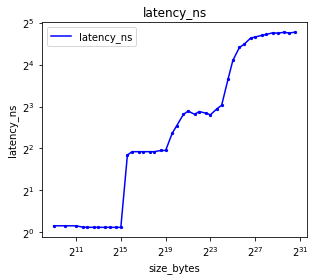

In [34]:
df = render_csv("lat_mem_rd.csv")
df["size_bytes"] = df["size_MB"]*1024*1024
plotPE(df=df, what=[("size_bytes", "latency_ns")], lines=True, logx=2, logy=2, log_autoscale_x=False, log_autoscale_y=False)
display_mono(df)

The "stair step" pattern you see is the jump in latency as data accesses start being served out of the slower and slower, layers of the memory hierarchy.   The steps occur roughly we expect them to:  32KB or say $2^{15}$ B (L1 to L2), 1024KB or say $2^{20}$ B (L2 to L3), and 24.75MB or say $~1.55 \times 2^{24}$ B (L3 to DRAM).  For larger sizes things get noisier so the "steps" aren't as crisp.

<div class="alert alert-block alert-success"><div class="question correctness points-4">

### Question 4 (Correctness)

<div class="question-text">

Based on this graph, give the latencies for each level of the caches. You should assume the CPU frequency is 4GHz

</div>
</div>
</div>

<div class="alert alert-block alert-success">
<div class="answer">

| Level of the memory hierarchy | latency (ns) |  latency (Cycles) |  
| ------------------------------|---------|-| 
| L1  | 1.082 | 5 |
| L2  | 6.976 | 28 |
| L3  | 25.981 | 104  |
| Main memory | 27.399 | 110 |

CPU frequency is 4 GHz:
$$1 \ cycle = \frac{1}{4 \times 10^9} \ seconds = 0.25 \ ns$$
So,
$$Latency \ cycles = \frac{Lantency \ ns}{0.25}$$

Based on the graph:

L1 (First plateau, `32KB`): \
The average latency of the first plateau = 1.082 ns. \
Latency cycles = 5 cycles.
$$Latency \ cycles = \frac{Lantency \ ns}{0.25} = \frac{1.082}{0.25} = 4.328 \approx 5 \ cycles$$

L2 (Second plateau, `1024KB` or `8388608B`): \
The average latency of the second plateau = 6.976 ns. \
Latency cycles = 28 cycles.
$$Latency \ cycles = \frac{Lantency \ ns}{0.25} = \frac{6.976}{0.25} = 27.184 \approx 28 \ cycles$$

L3 (Third plateau, `24.75MB` or `201326592B`): \
The average latency of the third plateau = 25.981 ns. \
Latency cycles = 29 cycles.
$$Latency \ cycles = \frac{Lantency \ ns}{0.25} = \frac{25.981}{0.25} = 103.924 \approx 104 \ cycles$$

Main Memory (Fourth plateau, `1610612736B` or `192MB`): \
The average latency of the fourth plateau = 27.399 ns. \
Latency cycles = 110 cycles.
$$Latency \ cycles = \frac{Lantency \ ns}{0.25} = \frac{27.399}{0.25} = 109.596 \approx 110 \ cycles$$
</div>    
</div>

## Cache Bandwidth

We don't have a handy tool for measuring cache bandwidth.  Maybe we'll build one as a future programming lab...

We do however, have some technical details about about processor, so we can calculate what the peak (maximum attainable) cache bandwidth should be.

Intel's Sky Lake processors (of which our CPU is an example) [More Info] (https://www.intel.com/content/www/us/en/products/sku/120485/intel-xeon-gold-6140-processor-24-75m-cache-2-30-ghz/specifications.html) can execute up to 2 64-byte loads and up to 4 64-byte store per cycle.  At 3.7 GHz, this works out to $$2 \times 64 \times 3.7 \times 10^9 = 473.6 GB/s$$ for loads and $$4 \times 64 \times 3.7 \times 10^9 = 947.2 GB/s$$ for stores.

The L2 cache provide one 64-bytes load _or_ store per cycle for $$64 \times 3.7\times 4e9= 236.8 GB/s$$.

I don't have any information about the L3. 

## Are the Caches Fast?

They are certainly better than DRAM -- the L1's latency is $\frac{17.148000}{1.110000} = 15.45$ times lower than DRAM, and bandwidth (in our system with two channels of DRAM) is $\frac{}{25.6} = 18.5$ times higher.  Not only that, remember that we have 36 cores, so the total L1 cache read bandwidth is $473.6GB/s \times 36 ~ 17049.6 GB/s ~ 17 TB/s$.

However, the minimum load latency -- $\lceil \frac{1.1}{\frac{1}{3.7\times 10^9}} \rceil = 5$ cycles -- is still pretty high, considering that it's 5 times longer than the latency for a simple integer arithmetic operation (add, sub, etc.).  That means that having lots of load instructions can have a significant impact on CPI.

Caches are also slow compared to the register file. The register file latency is a little hard to quantify in a way that is comparable to cache latency, but 1/2 a cycle is a reasonable approximation. The register file is also quite large:  The total size is about 1kB.   It's reasonable to think of the register file a software-managed, "L0" cache.

# Locality In Space and Time

Caches improve program performance by exploiting the fact that memory accesses are not random: Programs access memory in patterns and there is a lot of repetition in what programs do and a lot of similarity how programs behave at different times.  This is not surprising since, programs are written languages with constructs like loops and function calls:  These constructs naturally give rise to patterns because they cause the same code to execute repeatedly.


## Spatial Locality

As you should recall from lecture, _spatial locality_ is a property of a program (or part of a program) where it accesses memory locations nearby locations it has accessed recently.  Let's see how spatial locality can affect performance.

Here's a simple test program that accesses a 1-dimensional tensor at different "strides".  The "stride" of a sequence of accesses is just the distance between consecutive accesses.  So, "stride 1" means accessing each element, and "stride 2" means accessing every other element.  The outer loop ensures ensures that the total number of accesses the loop perform remains the same, regardless of stride size).

Examine the code below, and then answer these question:

In [13]:
t = fiddle("stride.cpp", function="stride", name="spatial", opt="-O1",
code=r"""
#include"function_map.hpp"
#include<cstdint>


extern "C"
uint64_t* stride(uint64_t * data, uint64_t size, uint64_t arg1) {
    uint64_t sum=0;
    for(uint i = 0; i < arg1; i++) {
        for(uint x = 0; x < size; x+=arg1) {
            sum+=data[x];
        }
    }
    data[0] = sum;
    return data;
}

FUNCTION(one_array_1arg, stride);
""")

Done code generation...


<div class="alert alert-block alert-success"><div class="question correctness">

### Question 5 (Correctness)

<div class="question-text">
How many L1 D-cache misses would you expect for `stride == 1`?  How about `stride == 8` and `stride == 16`?  Assume `size` is very large and that cache lines are 64 bytes. 
</div>
<div class="answer">

**`stride == 1` L1 D-Misses:** 

**`stride == 8` L1 D-Misses:**
    
**`stride == 16` L1 D-Misses:** 

</div>
</div>
</div>

<div class="alert alert-block alert-success">
<div class="answer">
    
Answer:
    
Assume cache line size (B) = 64 bytes \
Each element (uint64_t) = 8 bytes \
So, 1 cache line = 8 elements \
$$1 \ cache \ line = \frac{64 \ bytes}{8 \ bytes \ per \ element} = 8 \ elements$$

**`stride == 1` L1 D-Misses:** \
$Miss \ rate = 12.5\%$

Access pathen: data[0], data[1], data[2], ... \
Every cache line fetched (8 elements) gives 1 miss + 7 hits. \
So, the total L1 D-misses = number of lines:
$$Misses = \frac{size}{8} = 12.5\% \ Miss \ Rate$$

**`stride == 8` L1 D-Misses:** \
$Miss \ rate = 100\%$

Access pathen: data[0], data[8], data[16], ... \
Each access jumps exactly one cache line (8 elements $\times$ 8 bytes = 64 bytes). \
That means every access is to a different cache line → no spatial reuse.
$$Misses = Size = 100\% \ Miss \ Rate$$

**`stride == 16` L1 D-Misses:** \
$Miss \ rate = 100\%$

Access pattern: data[0], data[16], data[32], ... \
Each step jumps two cache lines ahead (16 $\times$ 8 = 128 bytes). \
So, this is even worse for spatial reuse — still one miss per access.
$$Misses = Size = 100\% \ Miss \ Rate$$
</div>
</div>



Now, let's verify the result through running the program (by setting `-a` as `1 8 16`! Let's see if those predictions match reality.  Run the cell below.  It'll run the code above.



In [38]:
!rm -f build/stride.so; make build/stride.so C_OPTS='-mno-avx -O1' fiddle.exe
!cs203 run './fiddle.exe -l build/stride.so -f stride -M 3700 -size 134217728 -a 1 8 16 64 -i 10 -o spatial.csv'

mkdir -p build/ 
cp *.hpp build/
cp *.h   build/
g++-9  -DHAVE_LINUX_PERF_EVENT_H -DHAVE_LINUX_PERF_EVENT_H -I/home/twan012/2025fa-cs203-memory-1-HugoWan0504 -g -mno-avx -O1 -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -rdynamic -fPIC -shared -o build/stride.so build/stride.cpp
make: 'fiddle.exe' is up to date.
Running on the cloud for: twan012@ucr.edu
registering function: stride
Dynamically registering stride
Execution started
Execution completed


Let's draw the results into tables and graphs and see what those look like

,arg1,size,IC,Cycles,CPI,CT,ET,L1_dcache_miss_rate,L1_dcache_misses,L1_dcache_accesses
0,1,134217728.000000,6731614008.000000,3537537507.000000,0.525511,0.272129,0.962662,0.125012,168449051.750000,1347467893.750000
1,8,134217728.000000,6830737943.000000,23651243856.750000,3.462473,0.271772,6.427754,0.980982,1346862331.250000,1372973149.750000
2,16,134217728.000000,6919263147.500000,39510809142.500000,5.710271,0.272080,10.749937,0.967767,1351013583.000000,1396014331.000000
3,64,134217728.000000,6911249633.500000,40044013401.500000,5.794051,0.270953,10.850031,0.980848,1367607937.500000,1394315022.750000


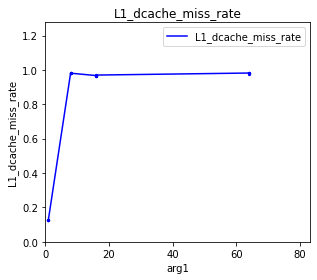

In [39]:
df = render_csv("spatial.csv", average_by="arg1", columns=["size", "IC", "Cycles", "CPI", "CT", "ET", "L1_dcache_miss_rate","L1_dcache_misses","L1_dcache_accesses"])
display_mono(df)
plotPE("spatial.csv", lines=True, what=[("arg1", 'L1_dcache_miss_rate')])

<div class="alert alert-block alert-info">

### Question 6 (Completeness)


Do the measurements match our predictions?  Does anything seem surprising about the results?

</div>

<div class="alert alert-block alert-info">
<div class="answer">

**You must provide comprehensive discussion regarding what have you seen and why or why not it's surprising**

Answer: 
Looking at the result table: \
Stride == 1 has a miss rate of 12.5%, which matches my prediction of the miss rate $\frac{size}{8} \times 100\% = \frac{1}{8} \times 100\% \approx 12.5\%$

For any stride equal or above of 8, they have a miss rate of nearly 100% (97.3% to 98.3% are shown in the table).

The measurements match the analytical predictions very closely. \
Nothing in these results is unexpected — the data reinforces the textbook cache-locality model.
</div>
</div>

Of course, it's not really the misses we are worried about -- it's the impact on performance.

Recall what happens on a cache miss:  Instead of having accessing the data in the cache, the processor must go down the memory hierarchy.  In the worst case, this means going to main memory, which can easily take 100s of cycles.  Let's imagine it's 200 cycles.  What will the impact be on CPI?



For the next time account for the 5-cycle latency for hits in the problem.  If you do, this prediction is much closer to the result.

Use a value for miss latency is more closely matches the actual value.

<div class="alert alert-block alert-warning">

### Question 7 (Challenging)

    
Based on the data above, please estimate the average L1 miss penalty for the cases where the stride is 1 and the stride is 16.

Are the calculated miss penalties the same? Why or why not?

If L1 cache miss penalty increases to 150 cycles, what're the new CPIs for the cases where the stride is 1 and the stride is 16?
    

</div>
</div>

<div class="alert alert-block alert-warning">

<div class="answer">

**The average L1 miss penalty when stride == 8 (you may need to use the data points from stride == 1 and stride == 8)** \
3.431 cycle

**The average L1 miss penalty when stride == 16 (you may need to use the data points from stride == 1 and stride == 16)** \
6.152 cycles

**Are they the same? Why or why not?** \
They are not the same. With larger stride the accesses are farther apart, hardware prefetching helps less. \
Also, there’s less overlap with other work, so the exposed miss latency is higher ($\approx$ 6.15 cycles vs. $\approx$ 3.43 cycles).

**The new CPI for the case where stride is 1** \
New CPI = 18.848376.

**The new CPI for the case where stride is 16** \
New CPI = 144.9192271.

Please use the numbers from above experimental results in your estimations. Please use LaTeX to express your calculations.

From the data table:
1. Stride = 1: CPI = 0.525511, Miss Rate (MR) = 0.125012
2. Stride = 8: CPI = 3.462473, MR = 0.980982
3. Stride = 16: CPI = 5.710271, MR = 0.967767

The standard CPI decomposition model:
$$CPI = CPI_{hit} + (MR \times Miss \ Penalty)$$

Rearrange the formula:
$$Miss \ Penalty = \frac{\Delta CPI}{\Delta MR}$$

For stride == 8:
$$Miss \ Penalty_{(1|8)} = \frac{3.462473-0.525511}{0.980982-0.125012} = 3.431150624 \ cycles$$

For stride == 16:
$$Miss \ Penalty_{1|16} = \frac{5.710271-0.525511}{0.967767-0.125012} = 6.152155727 \ cycles$$

If miss penalty = 150 cycles, predict new CPIs: \
Plug in:
$$CPI_{new} = CPI_{hit} + MR \times 150$$

For stride == 1:
$$CPI_{hit}^{(1|8)} = CPI_1 - MR_1 \times MP_{(1∣8)} = 0.525511 - 0.125012 \times 3.431150624 = 0.09657599819$$
$$CPI_{new} \ (Stride \ 1) = 0.09657599819 + 0.125012 \times 150 = 18.848376$$

For stride == 16:
$$CPI_{hit}^{(1|16)} = CPI_1 - MR_1 \times MP_{(1∣16)} = 0.525511 - 0.125012 \times 6.152155727 = -0.245822917$$
$$CPI_{new} \ (Stride \ 16) = -0.245822917 + 0.967767 \times 150 = 144.9192271$$
</div>
</div>

## Temporal Locality

Temporal locality exists when a program accesses the same memory multiple times within a short time.  Caches exploit temporal locality by holding on to data that has been accessed recently.  If the processor accesses it again, the cache can provide it very quickly.

With spatial locality, it was pretty easy to predict the cache miss rate for a simple loop that performs stride-based accesses (see below).  With temporal locality it is harder because of associativity and conflicts.  Before we dive into that, let's have quick refresher about how caches work (if this is fuzzy, go back and the review the slides and/or readings).

When a memory operation (load or store) accesses a memory location, $A$, the cache breaks $A$'s address into three parts: 

| tag | index | offset | 
|-----|-------|--------|
| the remaining bits | `log2(# of associative sets)` | `log2(block size)`|

Together, the tag and the index of $A$ are a unique name (or number) for the cacheline-sized (and cacheline size-aligned) piece of memory that contains $A$.  The index of $A$ tells that cache which associative set might contain that cache line.

The cache can then check that set to see if $A$ is present.  If it is, it's a hit.  If not, it's a miss, and the cache will choose one of the lines in the set to evict to make room for $A$'s cache line.

There are two important things to note:

1.  $A$'s cacheline is in the cache if and only if, it is in the associative set corresponding to its index (it can never be in another associative set).
2.  There are many, many other cache lines that also "live" in $A$'s associative set.

The L1 data cache in our processor is 32KB, with 64-byte blocks/lines, and it's 8-way set associative. So, there are $\frac{32 \times 1024}{64}= 512$ cache blocks arranged in $\frac{512}{8} = 64$ associative sets.  If the machine has 256 GB of memory, it has 4.2 Million cache lines of main memory.  So, there are about 0.5 million cache lines that "live" in each associative set.  Clearly, there is plenty of opportunities for conflicts.

To see how temporal locality plays out in practice, here's the same code we looked at in the last question:

In [16]:
t = fiddle("stride_2.cpp", function="stride", name="spatial", opt="-O1",
code=r"""

#include"function_map.hpp"
#include<cstdint>



extern "C"
uint64_t* stride_2(uint64_t * data, uint64_t size, uint64_t arg1) {
    
    uint64_t sum = 0;
    for(uint i = 0; i < arg1; i++) {
        for(uint x = 0; x < size; x+=arg1) {
            sum += data[x];
        }
    }
    data[0] =sum;
    return data;
}

FUNCTION(one_array_1arg, stride_2);
""")

Done code generation...


We are going to run it again with a fixed stride of 8 elements (64 bytes -- our cache line size) and we will vary `size` between 1024 and 16384 (16 * 1024).  This corresponds to region of memory between 8kB and 128kB.  Setting the stride to the cache line size ensures that our access stream has very little _spatial_ locality, since every access will refer to a different cache line.

<div class="alert alert-block alert-success">

### Question 8 (Correctness)
    
Given the conditions described above, estimate the _number of cache misses_ that will occur for `size = 1024`, `size = 4096`, and `size = 16384`.  Assume we run `stride_2()` 10,000 times with the same values of `data` and `size`. The stride size is 8.


</div>

<div class="alert alert-block alert-success">    
<div class="answer">

Answer:    

**Cache misses for size = 1024:** \
Size 1024 has $1.024 \times 10^7$ misses

**Cache misses for size = 4096:** \
Size 4096 has $5.12 \times 10^6$ misses

**Cache misses for size = 16384:** \
Size 16384 has $1.6384 \times 10^8$ misses

**Show your work here**

The L1 data cache in our processor is 32KB. \
Each element is 8 bytes.

Size 1024 has array bytes of 8kB, which is less than 32kB, fits in L1.
$$1024 \times 8 = 8kB$$
Size 4096 has array bytes of 32kB, which exactly or barely fits in L1.
$$4096 \times 8 = 32kB$$
Size 16384 has array bytes of 128kB, which is more than 32kB, does not fit in L1.
$$16384 \times 8 = 128kB$$

Stride = 8 elements = 64 bytes means that each access jumps to a new cache line. \
Therefore, every access is a miss (no spatial locality).

With this in mind:

For size = 1024, 8 KB array fits in L1. \
Each of the 1024 elements is on a different line the first time. \
After that, all lines stay cached for later iterations.
$$Misses \ per \ iteration = 1024$$
$$Total \ misses = 1024 \times 10000 = 1.024 \times 10^7$$
    
For size = 4096, 32 KB array = exact L1 capacity. \
Each cache line = 64 B. $\frac{32KB}{64B}$ = 512 unique lines.
Once these 512 lines are filled, the cache is fully occupied but no eviction occurs because the working set equals the cache capacity.
$$Misses \ per \ iteration = 512$$
$$Total \ misses = 512 \times 10000 = 5.12 \times 10^6$$

For size = 16384, 128 KB > 32 KB → cannot fit in L1. \
Every access replaces a previous line, so no temporal reuse.
$$Misses \ per \ iteration = 16384$$
$$Total \ misses = 16384 \times 10000 = 1.6384 \times 10^8$$
</div>
</div>

Run the cells below to see how your prediction played out.

mkdir -p build/ 
cp *.hpp build/
cp *.h   build/
g++-9  -DHAVE_LINUX_PERF_EVENT_H -DHAVE_LINUX_PERF_EVENT_H -I/home/twan012/2025fa-cs203-memory-1-HugoWan0504 -g -mno-avx -O1 -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -rdynamic -fPIC -shared -o build/stride_2.so build/stride_2.cpp
make: 'fiddle.exe' is up to date.
Running on the cloud for: twan012@ucr.edu
registering function: stride_2
Dynamically registering stride_2
Execution started
Execution completed


,size,arg1,IC,CPI,CT,ET,L1_dcache_miss_rate,L1_dcache_misses,L1_dcache_accesses
0,1024,8.000000,52219292.500000,0.331106,0.281577,0.004868,0.000057,590.000000,10418970.666667
1,2048,8.000000,103427682.833333,0.309377,0.275301,0.008809,0.000048,996.333333,20662937.500000
2,4096,8.000000,205844901.666667,0.303727,0.270750,0.016928,0.028086,1155741.500000,41150860.500000
3,6144,8.000000,308259183.833333,0.300765,0.271880,0.025207,0.999606,61613112.500000,61637426.000000
4,8192,8.000000,410670287.333333,0.298812,0.270779,0.033228,0.999478,82079889.666667,82122719.833333
5,16384,8.000000,820326719.666667,0.296690,0.270852,0.065920,0.999669,164014627.666667,164068808.333333


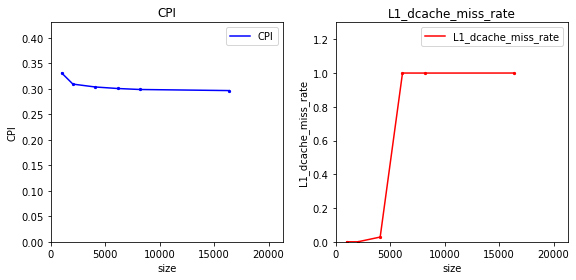

In [17]:
!make build/stride_2.so C_OPTS='-mno-avx -O1' fiddle.exe
!cs203 run './fiddle.exe -l build/stride_2.so -M 3700 -f stride_2 -s 1024 2048 4096 6144 8192 16384 -a 8 -i 10000 -o temporal.csv'
df = render_csv("temporal.csv", average_by = "size",columns=["arg1", "IC", "CPI", "CT", "ET", "L1_dcache_miss_rate","L1_dcache_misses","L1_dcache_accesses"])
display_mono(df)
plotPE(df=df, lines=True, what=[ ('size', 'CPI'), ('size', 'L1_dcache_miss_rate')])

<details>

<summary>Prediction v.s. reality</summary>

 For small sizes, agreement is not great.  We predicted 128 misses at `size=1024`, but we have a few thousands. This is fine, there's other stuff going on and the `L1_dcache_miss_rate` is still very, very low.
    
Our prediction at `size = 16384` is pretty close. 
    
The `size=4096` is interesting. It should exactly fit (4096/8 = 512 blocks), but we have a lot more misses.  This is because there's other stuff in memory (e.g., the stack) and the data should just barely fit.   However, while get significantly more misses than at `size=1024`, the `CPI` is still quite low.
    
</details>

# The Three C's

Recall from lecture (or review the slides) that we can classify cache misses into types (known as "The Thee C's"):

1.  **Compulsory**: These misses occur because the processor has not accessed this cache line before.

2.  **Capacity**: These occur because the program is accessing more memory than the cache can hold (i.e., it's working set is bigger than the cache).

3.  **Conflict**: These occur because a given cache line of memory can only live in one of the associative sets of the cache.

## Capacity and Compulsory Misses

The our investigation of spatial locality, temporal locality, and working sets illustrated compulsory and capacity misses.

<div class="alert alert-block alert-danger">

**Compulsory** The misses that occur in the first time through the inner loop of `stride()` are all compulsory misses.
</div>

<div class="alert alert-block alert-danger">

**Capacity** In the same experiment, we saw that when the number of cachelines accessed exceeds the number of cache lines in the cache, we get many misses.  These are all capacity misses:
   
</div>

<div class="alert alert-block alert-success">

### Question 9 (Correctness)
    
What's the major types of misses in Question 8 when `size == 1024` and `size == 16384`. 


</div>

<div class="alert alert-block alert-success">
<div class="answer">
Answer:

**What's the major type of 'stride()' in Question 8 when `size == 1024`?**

Each cache set can hold 8 cache lines, and when `size == 1024`, the working set only needs 2 cache lines to store all accessed data. \
The L1 cache has a total capacity of `32 KB`, which corresponds to 32,768 B / 8 B = 4096 elements. \
Since the total data accessed (`size == 1024`) is well below this capacity, the cache can easily store all lines without eviction.

Because each accessed cache line is loaded for the first time, these misses happen only once per unique line and are therefore compulsory misses. \
There are no capacity or conflict misses in this case.

Major miss type: `Compulsory misses`.

**What's the major type of 'stride()' in Question 8 when `size == 16384`?**

When `size == 16384`, the working set becomes about `128 KB` (`131,072 B`), which is much larger than the `32 KB` L1 cache capacity. \
This means the total number of cache lines that need to be loaded (`2048 lines, each 64 B`) far exceeds the cache’s total line capacity (512 lines, `32 KB / 64 B = 512`).

Initially, the first 512 lines fill the cache. \
After that, every new line access causes an eviction of an older one. \
Hence, once the cache is full, every subsequent access replaces an existing line—leading to continuous capacity misses.

In other words:
- The first 512 misses are compulsory (first-time access).
- The remaining thousands of misses happen because the working set > cache capacity, making them capacity misses.

This clearly illustrates the relationship between working set size and cache miss behavior:
- When the working set fits inside the cache → few misses, mostly compulsory.
- When it exceeds the cache capacity → sharp increase in misses, dominated by capacity misses.

Major miss type: `Capacity misses`.
</div>
</div>

## Conflict Misses

Let's try to produce some conflict misses. For conflict misses, we need something different:  Highly-organized misses placed precisely.

The necessary ingredients for lots of conflicts misses are many memory accesses that will map to the same associative set in the cache.  If we access many of these cache lines, the associative set will "overflow" and that will causes misses.

<div class="alert alert-block alert-warning">

### Question 10 (Challenging)
    
Assume our 48KB cache with 64-byte lines and 12-way associativity and 64-bit addresses.  Given an address $A$, how can we compute a new address, $B$, that will map to the same associative set but is not part of the same cache line as $A$?  Given an index, $i$, into a `uint64_t` array, how can we compute the index of another element, $j$, that will conflict with the first? 

</div>

<div class="alert alert-block alert-warning">
<div class="answer">

To generate conflict misses, we must repeatedly access memory addresses that map to the same cache set, even while the cache still has unused capacity. \
This requires the working set to remain within the total cache capacity — in this case, a `48 KB` cache, which equals `49,152 bytes` or `6,144 elements` (each element being 8 bytes).

Recall the formula:
$$C = ABS$$
Cache size (C) = 48 KB, Associativity (A) = 12 ways, 64 bytes per Block, Number of set (S) = 64 sets.
$$48 \times 1024 = 12 \times 64 \times S$$
$$S = \frac{48 \times 1024}{12 \times 64} = 64 \ sets$$

Number of the Block Offset bits = 6 bits
$$lg(B) = lg(64) = 6$$

Number of the Set Index bits = 6 bits
$$lg(S) = lg(64) = 6$$

Number of the tag bits = 52 bits
$$Tag \ bits = Addresses \ bits - index \ bits - offset \ bits = 64 - 6 -6 = 52 \ bits$$

**How do you compute `B`?**

To make a new address `B` that maps to the same set as address `A`, both must share the same index but have different tag bits. \
That means `B` must be offset by exactly one full “set range” in memory:
$$B = A + 2^{(index + offset)} = A + 2^{12} = A + 4096 \ bytes$$
The offset that causes a conflict miss is `4 KB`.

Each element in the array is 8 bytes, so the address difference corresponds to:
$$B = A + 2^9 \ elements = A + 512 \ elements$$

Thus, the address of the conflicting element is displaced by 512 elements in memory. \
This 512-element stride ensures the next access maps to the same cache set as `A`, but with a different tag, creating conflict behavior.


**How do you compute `j`?**

From the relationship above,
$$j = i + 512 \times N$$
where:
- `i` is the current element index.
- `N` is an integer representing how many set cycles we move through.

Each increment of 512 elements moves to the same set as `i`. \
However, if we need a direct conflict with the exact first element `i`, we must wrap around the entire cache (`48 KB`) once per associativity (`12 sets`), giving:
$$j = i + 512 \times 12 \times N = 6144 \times N$$
This ensures the element `j` conflicts precisely with `i` after traversing all sets in the cache.
</div>
</div>

Let's see if your formula worked.  We'll run `stride()` from early with a stride of 8 and 512.  In the experiment below we set the size `-s` so that we cover 64 strides worth of the memory, since both strides are larger than cache line, each execution of the loop will touch 64 cache lines.

In [18]:
from notebook import *

t = fiddle("conflict.cpp", code="""
#include"function_map.hpp"
#include<cstdint>

extern "C"
uint64_t* conflict(uint64_t * data, uint64_t size, uint64_t arg1) {

        uint64_t sum=0;
        for(uint x = 0; x < size; x+=arg1) {
            sum += data[x];
        }
        data[0] = sum;
        return data;
}

FUNCTION(one_array_1arg, conflict);
""")

!rm -f build/conflict.so; make C_OPTS="-mno-avx -O1" build/conflict.so
!cs203 run './fiddle.exe -l build/conflict.so -M 3700 -f conflict -size 1024 -a 8 -i 10000 -o stride8.csv'
!cs203 run './fiddle.exe -l build/conflict.so -M 3700 -f conflict -size 65536 -a 512 -i 10000 -o stride512.csv'

Done code generation...
make: Warning: File 'build/conflict.cpp' has modification time 49 s in the future
mkdir -p build/ 
cp *.hpp build/
cp *.h   build/
g++-9  -DHAVE_LINUX_PERF_EVENT_H -DHAVE_LINUX_PERF_EVENT_H -I/home/twan012/2025fa-cs203-memory-1-HugoWan0504 -g -mno-avx -O1 -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl -rdynamic -fPIC -shared -o build/conflict.so build/conflict.cpp
make: warning:  Clock skew detected.  Your build may be incomplete.
Running on the cloud for: twan012@ucr.edu
registering function: conflict
Dynamically registering conflict
Execution started
Execution completed
Running on the cloud for: twan012@ucr.edu
registering function: conflict
Dynamically registering conflict
Execution started
Execution completed


,index,size,rep,arg1,function,IC,Cycles,CPI,CT,ET,L1_dcache_miss_rate,L1_dcache_misses,L1_dcache_accesses
0,0,1024,1,8,conflict,6682065,2964791,0.443694,0.469848,0.001393,0.000368,536,1455328
1,0,65536,1,512,conflict,6682065,5265472,0.788001,0.324567,0.001709,0.879689,1280236,1455328


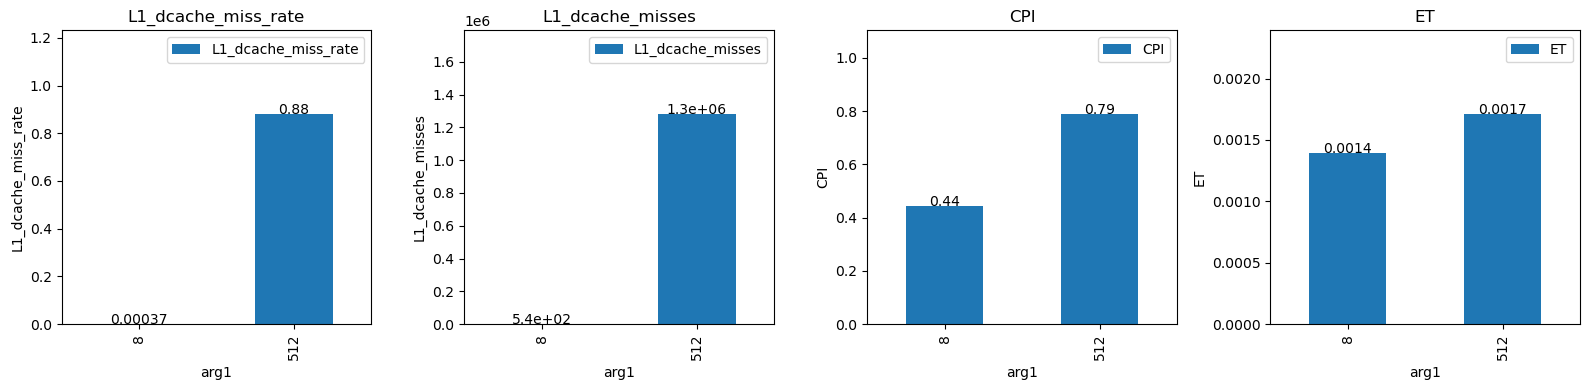

In [19]:
df = render_csv(["stride8.csv", "stride512.csv"])
display_mono(df)
plotPEBar(df=df, what=[("arg1", "L1_dcache_miss_rate"),("arg1", "L1_dcache_misses"), ("arg1", "CPI"), ("arg1", "ET")])

<div class="alert alert-block alert-info">

### Question 11 (Completeness)
    
Based on our analysis above, what do you think will happen with if the stride is one cache line longer (504) or or one cache line shorter (520)?  Why?

</div>

<div class="alert alert-block alert-info">    
<div class="answer">

Each uint64_t element = 8 B. \
Stride 512 means jumping 4096 B.

**Stride 504:**
$$504 \times 8 = 4032 \ B$$

The miss rate will drop sharply because the accesses no longer all map to the same set; conflict misses are reduced.

**Stride 520:**
$$520 \times 8 = 4160 \ B$$

Similarly, the miss rate will decrease, since the offset causes accesses to fall into different sets rather than a single one.
</div> 
</div>

<details>

<summary>Why 512, 504, and 520?</summary>

In the analysis analysis above, we chose 512 because it was $2^{12}/\mathrm{sizeof(uint64\_t)}$, and we choose $2^{12}$ because that stride size would change the tag bits without changing the index bits.  And this, in turn, would cause all the cache lines to fall in a singe associative set.  A look at the binary representation of $2^{12}$ shows with this is true: `1 0000 0000 0000b`. (the `b` means binary).  Since there are no 1's in low order bits, adding $2^{12}$ won't change the index or offset.
    
For stride 520 in an array of `uint64_t`, the number of bytes in stride is 4160:  Let's look at 4160 in binary: `1 0000 0100 0000b`.  It has 1 down there, so adding it _will_ change the index.  So, the cache lines _will not_ fall into a single associative set.  Hence, cache misses should be lower.
</details>

Let's see what happens:


Running on the cloud for: twan012@ucr.edu
registering function: conflict
Dynamically registering conflict
Execution started
Execution completed
Running on the cloud for: twan012@ucr.edu
registering function: conflict
Dynamically registering conflict
Execution started
Execution completed


,index,size,rep,arg1,function,IC,Cycles,CPI,CT,ET,L1_dcache_miss_rate,L1_dcache_misses,L1_dcache_accesses
0,0,1024,1,8,conflict,6682065,2964791,0.443694,0.469848,0.001393,0.000368,536,1455328
1,0,64512,1,504,conflict,6682065,3019921,0.451944,0.273186,0.000825,0.000417,607,1455328
2,0,65536,1,512,conflict,6682065,5265472,0.788001,0.324567,0.001709,0.879689,1280236,1455328
3,0,66560,1,520,conflict,6682165,2998454,0.448725,0.275142,0.000825,0.000407,593,1455360


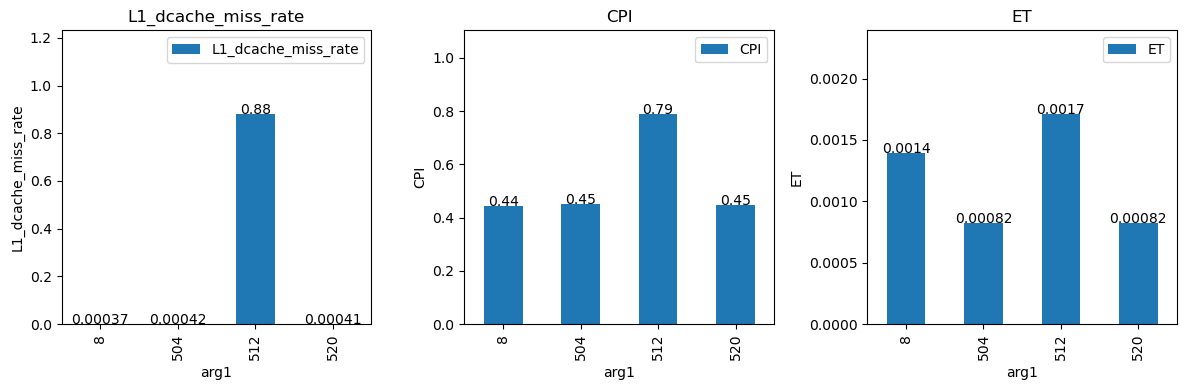

In [20]:
!cs203 run './fiddle.exe -l build/conflict.so -f conflict -size 64512 -a 504 -i 10000 -o stride504.csv'
!cs203 run './fiddle.exe -l build/conflict.so -f conflict -size 66560 -a 520 -i 10000 -o stride520.csv'
df = render_csv(["stride8.csv", "stride504.csv", "stride512.csv", "stride520.csv"])
display_mono(df)
plotPEBar(df=df, what=[("arg1", "L1_dcache_miss_rate"), ("arg1", "CPI"), ("arg1", "ET")])


<div class="alert alert-block alert-danger">
    
The number of misses per instruction is almost identical to the stride-8 case!
    
</div>


The main lesson here is that conflict misses are largely product of bad luck:  It may happen that for a particular cache capacity, associativity, and line size, that many cache lines in the application's working set happen to map to the same associative set.

Fortunately, in modern processors caches are pretty highly-associative (our is 8-way) and at that level of associativity conflict misses are not a huge problem.  If you working set is smaller than your cache's capacity, you'd have to be very unlucky to have enough cache lines land in the same associative set to cause many conflict misses.  As the example above shows, however, it is not hard to construct programs that are this unlucky.  We have a term for these access patterns:  We say they are "pathological".

By definition, pathological access patterns are rare, so we don't spend too much time worrying about them.  But they can crop up and it's a good idea to be aware of the possibility.

# Turning In the Assignment

After you complete the assignment, you will turn it in by creating a version of the notebook that only contains your answers. After verifying the generated version contains the critical parts of the assignent, you need to turn in your notebook through Gradescope. 

**Step 1:**  Save your workbook!!!

In [43]:
!for i in 1 2 3 4 5; do echo Save your notebook!; sleep 1; done

Save your notebook!
Save your notebook!
Save your notebook!
Save your notebook!
Save your notebook!


**Step 2:** After you complete the assignment, you will need to turn it in by creating a version of the notebook that only contains your answers. Run this command:

In [47]:
!cs203 turnin assignment.ipynb
!ls -lh assignment.turnin.ipynb

Wrote to assignment.turnin.ipynb
-rw-r--r-- 1 twan012 ucr 57K Oct 24  2025 assignment.turnin.ipynb


The date in the above file listing should show that you just created `assignment.turnin.ipynb`

**Step 3:**  Click on this link to open it: [./assignment.turnin.ipynb](./assignment.turnin.ipynb)


**Step 4:**  Make sure all your answers are visible and not cut off the side of the page.


**Step 5:**  Commit everything. Please run the following command.

In [41]:
!git add -f assignment.turnin.ipynb
!git commit -am "Yay! I am ready to turn in!"
!git push

[main 9c75e19] Yay! I am ready to turn in!
 1 file changed, 132 insertions(+), 119 deletions(-)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 20 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 12.72 KiB | 1.59 MiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:CS203UCR/2025fa-cs203-memory-1-HugoWan0504.git
   ad1d656..9c75e19  main -> main


**Step 6**: 
Submit through gradescope.
- You'll have to submit to CS203's gradescope assignment.
- It'll run the autograder and return the results.